In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from ipywidgets import interact, IntSlider

In [ ]:
def generate_data(n_samples, noise):
    time = np.linspace(0, 10, n_samples)
    position = np.exp(- 0.2 * time) * np.cos(4 * time)
    noise_sample = np.random.normal(0, noise, size=(n_samples, ))
    return position + noise_sample

In [ ]:
position = generate_data(1000, 0.1)

Text(0, 0.5, 'Posicion')

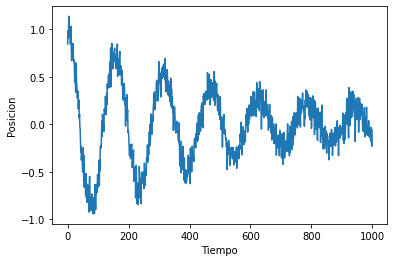

In [ ]:
fig, ax = plt.subplots()
ax.plot(position)
ax.set_xlabel("Tiempo")
ax.set_ylabel("Posicion")

In [ ]:
position.shape

(1000,)

In [ ]:
train_samples = int(position.size * 0.7)
x_train, x_test = position[:train_samples], position[train_samples:]

In [ ]:
x_train.shape

(700,)

In [ ]:
x_test.shape

(300,)

In [ ]:
window_size = 100
def show_window(t0):
    fig, ax = plt.subplots()
    ax.plot(x_train, label="Datos")

    window = np.arange(t0, t0 + window_size)
    ax.plot(window, x_train[window], label="Ventana")
    ax.scatter(
        [t0 + window_size],
        [x_train[t0 + window_size]],
        c="r",
        s=100,
        label="Prediccion"
        )
    ax.legend()

In [ ]:
interact(
    show_window,
    t0=IntSlider(value=0, min=0, max=x_train.size - window_size - 1)
    )

interactive(children=(IntSlider(value=0, description='t0', max=599), Output()), _dom_classes=('widget-interact…

<function __main__.show_window(t0)>

In [ ]:
def get_windows(x, window_size=20):
    X, y = [], []
    for i in range(x.size - window_size - 1):
        X.append(x[i: i + window_size].reshape(1, -1))
        y.append(x[i + window_size])
    return np.concatenate(X, axis=0), np.array(y)

In [ ]:
X_train, y_train = get_windows(x_train)

In [ ]:
X_train.shape

(679, 20)

In [ ]:
y_train.shape

(679,)

In [ ]:
X_test, y_test = get_windows(x_test)

In [ ]:
X_test.shape

(279, 20)

In [ ]:
y_test.shape

(279,)

In [ ]:
BaggingRegressor?

In [ ]:
estimator = BaggingRegressor(
    base_estimator=Ridge(), 
)

In [ ]:
param_grid = {
    "n_estimators": np.arange(5, 10),
    "max_features": np.linspace(0.5, 1, 6),
    "max_samples": np.linspace(0.4, 0.8, 5)
}

In [ ]:
5 * 5 * 6

150

In [ ]:
param_grid

{'n_estimators': array([5, 6, 7, 8, 9]),
 'max_features': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'max_samples': array([0.4, 0.5, 0.6, 0.7, 0.8])}

In [ ]:
RandomizedSearchCV?

In [ ]:
rsearch = RandomizedSearchCV(
    estimator = estimator,
    param_distributions = param_grid,
    cv = TimeSeriesSplit(n_splits=3, max_train_size=100),
    n_iter = 20
)

In [ ]:
rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=100, n_splits=3, test_size=None),
                   estimator=BaggingRegressor(base_estimator=Ridge()),
                   n_iter=20,
                   param_distributions={'max_features': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_samples': array([0.4, 0.5, 0.6, 0.7, 0.8]),
                                        'n_estimators': array([5, 6, 7, 8, 9])})

In [ ]:
pd.DataFrame(rsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_samples,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016327,0.007553,0.000976,0.000061,7,0.4,0.6,"{'n_estimators': 7, 'max_samples': 0.4, 'max_f...",0.909453,0.809934,0.790092,0.836493,0.052222,19
1,0.013022,0.000098,0.001000,0.000022,9,0.6,0.6,"{'n_estimators': 9, 'max_samples': 0.600000000...",0.901747,0.844219,0.795881,0.847282,0.043274,14
2,0.012739,0.000022,0.001082,0.000129,9,0.6,1.0,"{'n_estimators': 9, 'max_samples': 0.600000000...",0.924377,0.855571,0.814080,0.864676,0.045486,4
3,0.007371,0.000071,0.000793,0.000012,5,0.7,1.0,"{'n_estimators': 5, 'max_samples': 0.700000000...",0.924716,0.848726,0.810725,0.861389,0.047390,7
4,0.012889,0.000082,0.001055,0.000042,9,0.7,0.5,"{'n_estimators': 9, 'max_samples': 0.700000000...",0.898004,0.838714,0.799324,0.845347,0.040558,15
5,0.007392,0.000022,0.000761,0.000011,5,0.7,0.8,"{'n_estimators': 5, 'max_samples': 0.700000000...",0.918688,0.858642,0.806809,0.861380,0.045715,8
6,0.011248,0.002747,0.001193,0.000300,5,0.6,1.0,"{'n_estimators': 5, 'max_samples': 0.600000000...",0.919799,0.866967,0.809594,0.865453,0.045004,3
7,0.018871,0.001336,0.001641,0.000073,8,0.4,0.8,"{'n_estimators': 8, 'max_samples': 0.4, 'max_f...",0.886984,0.836436,0.801131,0.841517,0.035233,17
8,0.012033,0.000330,0.001324,0.000038,5,0.5,0.7,"{'n_estimators': 5, 'max_samples': 0.5, 'max_f...",0.890892,0.827849,0.803524,0.840755,0.036817,18
9,0.018808,0.005384,0.006448,0.007232,5,0.8,0.7,"{'n_estimators': 5, 'max_samples': 0.8, 'max_f...",0.914960,0.844274,0.811684,0.856973,0.043108,9


In [ ]:
best_model = rsearch.best_estimator_

In [ ]:
best_model

BaggingRegressor(base_estimator=Ridge(), max_samples=0.8, n_estimators=9)

In [ ]:
y_pred = best_model.predict(X_test)

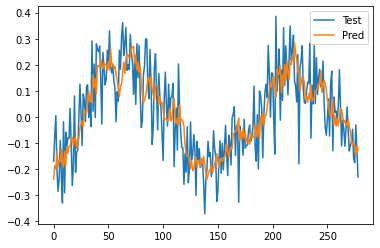

In [ ]:
fig, ax = plt.subplots()
ax.plot(y_test, label="Test")
ax.plot(y_pred, label="Pred")
ax.legend()

In [ ]:
r2_score(y_test, y_pred)

0.5312831669028574

In [ ]:
r2_score(y_test, np.ones_like(y_test) * y_test.mean())

0.0

In [ ]:
mean_squared_error(y_test, y_pred)

0.012612985219442369

In [ ]:
mean_absolute_error(y_test, y_pred)

0.09142416853540264

In [ ]:
window = X_test[-1].reshape(1, -1)

In [ ]:
window.shape

(1, 20)

In [ ]:
window

array([[ 0.02139514, -0.01378692,  0.04137116,  0.18046408,  0.03718398,
        -0.11213274, -0.01357724, -0.04724246, -0.1134801 , -0.04546678,
         0.03805836, -0.05264633, -0.13151949, -0.11006885, -0.09631116,
        -0.04813705, -0.16230297, -0.17620876, -0.03133307, -0.13370206]])

In [ ]:
np.roll(window, (0, -1))

array([[-0.01378692,  0.04137116,  0.18046408,  0.03718398, -0.11213274,
        -0.01357724, -0.04724246, -0.1134801 , -0.04546678,  0.03805836,
        -0.05264633, -0.13151949, -0.11006885, -0.09631116, -0.04813705,
        -0.16230297, -0.17620876, -0.03133307, -0.13370206,  0.02139514]])

In [ ]:
def forecasting(model, window_0, n_iters):
    predict = []
    window = window_0.copy()
    for _ in range(n_iters):
        pred = model.predict(window)
        window = np.roll(window, (0, -1))
        window[0, -1] = pred
        predict.append(pred)
    return np.array(predict)

In [ ]:
y_test.size

279

In [ ]:
y_forecast = forecasting(best_model, window, 279)

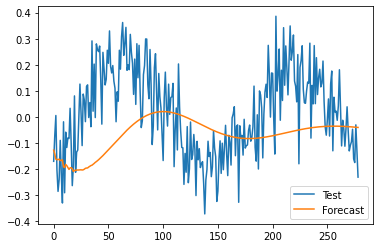

In [ ]:
fig, ax = plt.subplots()
ax.plot(y_test, label="Test")
ax.plot(y_forecast, label="Forecast")
ax.legend()